<a href="https://colab.research.google.com/github/RAV10K1/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# 1) Bayesian Inference

In [0]:
# Creating function to calculate Bayesian inference
def prob_drunk_given_pos(prob_drunk_prior, false_pos_rate, true_pos_rate, num_of_tests):
  posterior_prob = prob_drunk_prior
  for test in range(0, num_of_tests):
    p_drunk = posterior_prob
    p_not_drunk = (1-p_drunk)
    p_pos_given_drunk = true_pos_rate
    p_pos_given_not_drunk = false_pos_rate 
    posterior_prob = (p_pos_given_drunk*p_drunk)/((p_pos_given_drunk*p_drunk) + (p_pos_given_not_drunk*p_not_drunk))
  return posterior_prob  

### Probability that a person is drunk after one positive test:

In [24]:
print(f'Probability that the person is drunk after one test: {prob_drunk_given_pos(0.001, 0.08, 1, 1)*100}%')

Probability that the person is drunk after one test: 1.2357884330202669%


### Probability that a person is drunk after two tests:

In [25]:
print(f'Probability that the person is drunk after two tests: {prob_drunk_given_pos(0.001, 0.08, 1, 2)*100}%')

Probability that the person is drunk after two tests: 13.525210993291495%


### No. of breathalyzer tests needed to determine minimum probability of 95% that a person is drunk:

In [26]:
# 4 tests are required to determine drunkeness with 95% probability.
prob_drunk_given_pos(0.001, 0.08,1,4)*100

96.06895076105054

# 2) Exploring scipy.stats.bayes_mvs (Optional)

In [82]:
# Using scipy.stats Bayeseian function on Titanic dataset (Used in stretch goal below)
stats.bayes_mvs(df_titanic['Survived'])[0]

Mean(statistic=0.3855693348365276, minmax=(0.35864453947958164, 0.4124941301934736))

# 3) Difference Between Bayesian and Frequentist Statistics

* Bayesan statistics is an approach that applies probabilities to statistical questions.
* Whereas frequentist statistics approaches problems by trying to eliminate uncertainty by providing estimates, Bayesian statistics instead preserves uncertainty but updates prior beliefs based on new evidence.
* The following example on coinflips illustrates these two approaches. Firstly, frequentist statistics is used to calculate the confidence intervals of the coinflips. Then the same is calculated using Bayesian inference.


In [0]:
# Importing libraries
import random
import scipy.stats as stats
import numpy as np

In [0]:
# Setting random seed
np.random.seed(seed=42)

In [0]:
# Generating event space for 10,000 coinflips
coin_flips = np.random.binomial(n=1, p=0.5, size=10000)

In [30]:
# Calculating sample mean
np.mean(coin_flips)

0.4924

### Using Frequentist Approach

In [31]:
# Calculating confidence intervals using scipy.stats function at 95% confidence level (alpha).
CI_freq = stats.t.interval(0.95, len(coin_flips), 
                           loc=np.mean(coin_flips), 
                           scale=stats.sem(coin_flips))
CI_freq

(0.4825996360477385, 0.5022003639522615)

* This shows that given a sample mean of 0.49, we can tell with 95% confidence that the population mean falls between 0.48 and 0.50  

### Using Bayesian Approach

In [32]:
# Calculating the confidence intervals using Bayesian inference at the same confidence level of 95%.
CI_bayes = stats.bayes_mvs(coin_flips, alpha=0.95)
CI_bayes[0][1]

(0.48260131221789343, 0.5021986877821066)

In [33]:
# Checking if both values are exactly equal.
print(f'Confidence Intervals Frequentist : {CI_freq}')
print(f'Confidence Intervals Bayesian : {CI_bayes[0][1]}')
print(f'Are the values equal? : {CI_freq == CI_bayes[0][1]}')

Confidence Intervals Frequentist : (0.4825996360477385, 0.5022003639522615)
Confidence Intervals Bayesian : (0.48260131221789343, 0.5021986877821066)
Are the values equal? : False


* Although both values are similar, it can be seen that they begin to diverge after the second decimal but tend to be approximately close. This is illustrated in the following KDE plot. 

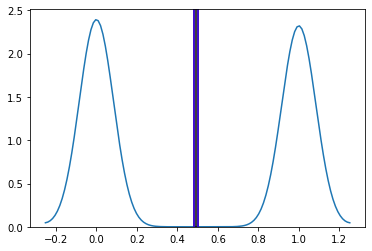

In [34]:
# Plotting the Kernel Density Estimates for Both Approaches
# Frequentist approach depicted in red
# Bayesian approach depicted in blue
# The sample mean is depicted by a black vertical line.
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(coin_flips)
plt.axvline(x=CI_freq[0], color='red')
plt.axvline(x=CI_freq[1], color='red')
plt.axvline(x=CI_bayes[0][1][0], color='blue')
plt.axvline(x=CI_bayes[0][1][1], color='blue')
plt.axvline(np.mean(coin_flips), color='k');

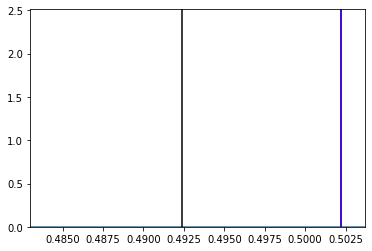

In [35]:
# Re-plotting the KDE to zoom closer.
sns.kdeplot(coin_flips)
plt.xlim(0.4830, 0.5037)
plt.axvline(x=CI_freq[0], color='red')
plt.axvline(x=CI_freq[1], color='red')
plt.axvline(x=CI_bayes[0][1][0], color='blue')
plt.axvline(x=CI_bayes[0][1][1], color='blue')
plt.axvline(np.mean(coin_flips), color='k');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# Importing libraries
import pandas as pd

In [37]:
# Using data from the titanic dataset.
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
df_titanic = pd.read_csv(url)
print(df_titanic.shape)
df_titanic.head()

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [38]:
# Checking for NaN values
df_titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [39]:
# Calculating means for columns of passengers
df_titanic.mean()

Survived                    0.385569
Pclass                      2.305524
Age                        29.471443
Siblings/Spouses Aboard     0.525366
Parents/Children Aboard     0.383315
Fare                       32.305420
dtype: float64

In [0]:
# Importing ttests from scipy.stats. 
from scipy.stats import ttest_1samp, ttest_ind

In [41]:
# Separating survivors.
df_surv = df_titanic[df_titanic['Survived']==1]
df_surv.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [42]:
# Separating non-survivors.
df_nsurv = df_titanic[df_titanic['Survived']==0]
df_nsurv.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [43]:
# Getting the mean age of passeners who survived
print(df_surv['Age'].mean())
# # Getting the mean age of passeners who did not survived
print(df_nsurv['Age'].mean())

28.408391812865496
30.13853211009174


#### In this example we will compare age and survival using the frequentist approach first followed by Bayesian inference.
* Null Hypothesis (H0) : Mean age of survivors == Mean age of non-survivors.
* Alternative Hypothesis (H1) : Mean age of survivors =/= Mean age of non-survivors.
* Calculation performed for 95% confidence level. (alpha = 0.95, p-value=0.05)

In [44]:
# Performing t-test on data.
ttest_ind(df_surv['Age'], df_nsurv['Age'], nan_policy='omit')

Ttest_indResult(statistic=-1.7781426849537694, pvalue=0.07572369567475853)

The test results show a p-value of ~ 0.76 which is greater than 0.05. Hence we reject the null hypothesis (H0) that there is no difference in average age of survivors and non-survivors.

In [0]:
# Defining function to calculate confidence intervals using Frequentist approach
# Modified from previous lecture notes.
def confidence_interval(data, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    data_array = data
    data_mean = data.mean()
    n = len(data)
    stderr = np.std(data_array, ddof=1)/np.sqrt(n)
    moe = stderr * stats.t.ppf((1 + confidence) / 2, n-1)
    return (data_mean, data_mean - moe, data_mean + moe)

In [52]:
# Calculating Confidence Intervals.
# For survivors
resultf1 = confidence_interval(df_surv['Age'])
print(f'Confidence Interval for Survivors : {resultf1}')
# For non-survivors
resultf2 = confidence_interval(df_nsurv['Age'])
print(f'Confidence Interval for Non-Survivors : {resultf2}')

Confidence Interval for Survivors : (28.408391812865496, 26.873841224782133, 29.94294240094886)
Confidence Interval for Non-Survivors : (30.13853211009174, 28.96908826583849, 31.307975954344993)


In [63]:
# Using Bayesian Inference approach
# For survivors
resultb1 = stats.bayes_mvs(df_surv['Age'])
print(f'Confidence Interval for Survivors : {resultb1[0][1]}')
# For non-survivors
resultb2 = stats.bayes_mvs(df_nsurv['Age'])
print(f'Confidence Interval for Non-Survivors : {resultb2[0][1]}')

Confidence Interval for Survivors : (27.121631429760487, 29.695152195970504)
Confidence Interval for Non-Survivors : (29.157616995870388, 31.119447224313095)


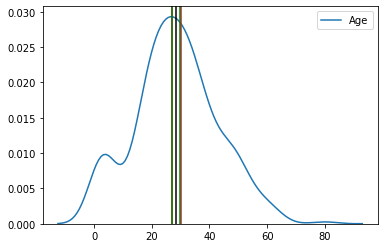

In [77]:
# Plotting confidence intervals on Kernel Density Estimate for Survivors
sns.kdeplot(df_surv['Age'])
plt.axvline(x=resultf1[0], color='k')
plt.axvline(x=resultf1[1], color='crimson') # Frequentist CI
plt.axvline(x=resultf1[2], color='crimson') # Frequentist CI
plt.axvline(x=resultb1[0][1][0], color='green') # Bayesian CI
plt.axvline(x=resultb1[0][1][1], color='green'); # Bayesian CI

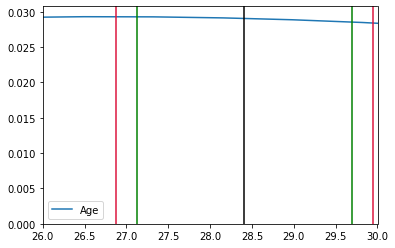

In [79]:
# Replotting for better look
sns.kdeplot(df_surv['Age'])
plt.xlim(26, 30)
plt.axvline(x=resultf1[0], color='k')
plt.axvline(x=resultf1[1], color='crimson')
plt.axvline(x=resultf1[2], color='crimson')
plt.axvline(x=resultb1[0][1][0], color='green')
plt.axvline(x=resultb1[0][1][1], color='green');

Based on the above data we can say that given an average age of 28.4 for the sample of survivors, we can be 95% confident that the mean age of a survivor would fall between 27.12 and 29.69 years old.

# PyMC3

In [83]:
# Installing PyMC3
pip install pymc3

In [0]:
# Importing libraries
import pymc3

In [93]:
# Downloading file from UCI website
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip

--2020-02-05 04:00:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35074 (34K) [application/x-httpd-php]
Saving to: ‘dow_jones_index.zip’

dow_jones_index.zip 100%[===================>]  34.25K  --.-KB/s    in 0.1s    

2020-02-05 04:00:14 (255 KB/s) - ‘dow_jones_index.zip’ saved [35074/35074]



In [94]:
# Unzipping file
!unzip dow_jones_index.zip

Archive:  dow_jones_index.zip
  inflating: dow_jones_index.data    
  inflating: dow_jones_index.names   


In [95]:
# Reading file into dataframe
df_dji = pd.read_csv('dow_jones_index.data')
df_dji.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [0]:
# Formatting Date column to infer date-time
df_dji['date'] = pd.to_datetime(df_dji['date'], infer_datetime_format=True)

In [0]:
# Removing $ from columns in the dataframe
df_dji = df_dji.replace({'\$':''}, regex=True)

In [109]:
# Checking dataframe
df_dji.head(3)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.42849,26,0.182704
1,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.47066,19,0.187852
2,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.63831,12,0.189994


In [0]:
# Extracting data for AA stock
df_aa = df_dji[df_dji['stock']=='AA']